<a href="https://colab.research.google.com/github/israelkingz/FashionMNIST/blob/master/ClassifyImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###My first Classification Model in Pytorch using Fashion-MNIST

In [9]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-01-29 09:45:23--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-01-29 09:45:23 (83.2 MB/s) - ‘helper.py’ saved [2813/2813]



In [0]:
#importing pytorch packages 
import torch
from torchvision import datasets, transforms
import helper

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

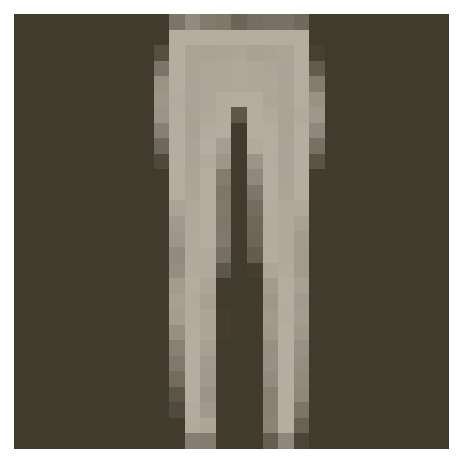

In [37]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

#Building the network
Here I define my network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes.I used ReLU activations for the layers and to return the logits or log-softmax from the forward pass.

In [0]:
from torch import nn, optim
import torch.nn.functional as F


In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [43]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.609..  Test Loss: 0.521..  Test Accuracy: 0.803
Epoch: 2/30..  Training Loss: 0.480..  Test Loss: 0.449..  Test Accuracy: 0.840
Epoch: 3/30..  Training Loss: 0.449..  Test Loss: 0.440..  Test Accuracy: 0.842
Epoch: 4/30..  Training Loss: 0.427..  Test Loss: 0.405..  Test Accuracy: 0.861
Epoch: 5/30..  Training Loss: 0.417..  Test Loss: 0.410..  Test Accuracy: 0.847
Epoch: 6/30..  Training Loss: 0.413..  Test Loss: 0.399..  Test Accuracy: 0.858
Epoch: 7/30..  Training Loss: 0.405..  Test Loss: 0.418..  Test Accuracy: 0.852
Epoch: 8/30..  Training Loss: 0.398..  Test Loss: 0.400..  Test Accuracy: 0.861
Epoch: 9/30..  Training Loss: 0.396..  Test Loss: 0.407..  Test Accuracy: 0.864
Epoch: 10/30..  Training Loss: 0.388..  Test Loss: 0.378..  Test Accuracy: 0.864
Epoch: 11/30..  Training Loss: 0.381..  Test Loss: 0.379..  Test Accuracy: 0.862
Epoch: 12/30..  Training Loss: 0.381..  Test Loss: 0.395..  Test Accuracy: 0.867
Epoch: 13/30..  Training Loss: 0.387.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

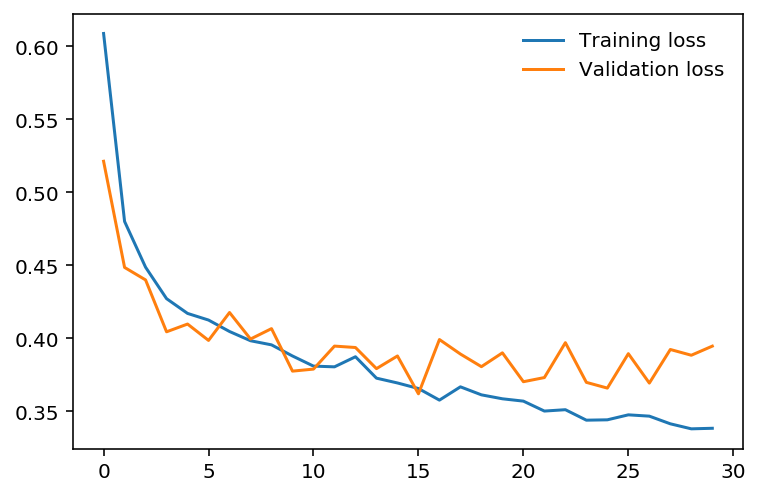

In [45]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

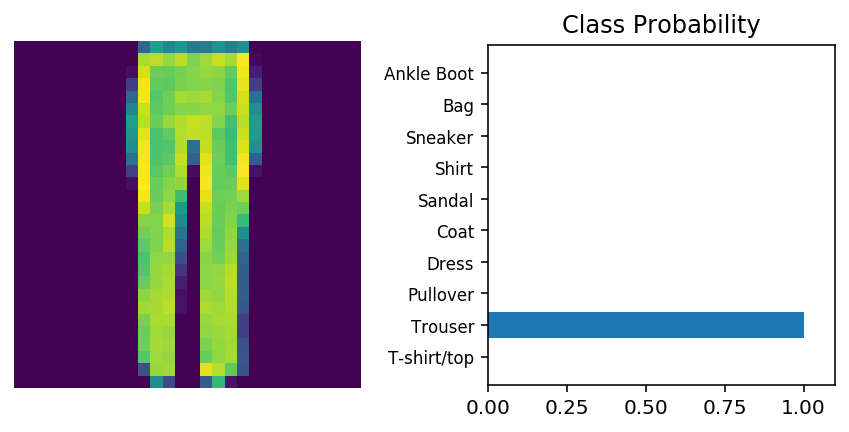

In [49]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

In [52]:
print("Our Model is \n\n", model, '\n')
print("Our state dict key \n\n", model.state_dict().keys())

Our Model is 

 Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 

Our state dict key 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [0]:
#to save model
torch.save(model.state_dict(),'save.pth')

In [0]:
state= torch.load("save.pth")

In [57]:
print(state.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])
